In [48]:
import keras
from keras.models import Model
from keras.applications.xception import preprocess_input
base_model = keras.applications.Xception(weights='imagenet')
x_model = Model(input=base_model.input, output=base_model.get_layer('avg_pool').output)
image_size = (299, 299)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("av..., inputs=Tensor("in...)`
  """


In [2]:
import pandas as pd
train_df = pd.read_csv("./data/train/train5_main.csv")
test_df = pd.read_csv("./data/test/test5_main.csv")
val_df = pd.read_csv("./data/validation/val5_main.csv")
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(23805, 3)
(6800, 3)
(3400, 3)


In [3]:
#A data generator function. Give the train csv as the pandas dataframe, batch size, the dictionary which maps 
#the genre to it's corresponding index and the doc2vec model which will give the title features, given the title id
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array, load_img
num_classes = 5
genre_to_index = {'Children':0,'Cookbooks, Food & Wine':1,'Law':2,'Medical Books':3,'Travel':4}

def train_generator_func(train_df, batch_size):
    
    j = 0
    #temp = 0
   
    temp = 0
    batch_feature_img = np.zeros((batch_size, 299, 299, 3), dtype = 'float32')
    batch_labels = [None] * batch_size
    
   # while True:
    for index, row in train_df.iterrows():               

        original = load_img(row['loc'], target_size=(299, 299))
        numpy_image = img_to_array(original)
        numpy_image_temp = numpy_image / 255.
        batch_feature_img[j] = numpy_image_temp

        batch_labels[j] = row['genre']
        j = j + 1
        if(j == batch_size):

            j = 0
            yield(batch_feature_img, batch_labels)

#We will use batch_size as 63, meaning the steps_per_epoch will be 33327 / 63 = 529. 

def validation_generator_func(val_df, batch_size):
    
    j = 0
    batch_feature_img = np.zeros((batch_size, 299, 299, 3), dtype = 'float32')
    batch_labels = [None] * batch_size

    #while True:
    for index, row in val_df.iterrows():

            original = load_img(row['loc'], target_size=(299, 299))
            numpy_image = img_to_array(original)
            numpy_image_temp = numpy_image / 255.
            batch_feature_img[j] = numpy_image_temp

            batch_labels[j] = row['genre']
            j = j + 1
            if(j == batch_size):
                j = 0
                yield(batch_feature_img,batch_labels)


In [33]:
# A test generator function.
def test_generator_func(test_df, batch_size):
    
    j = 0
    batch_feature_img = np.zeros((batch_size, 299, 299, 3), dtype = 'float32')
    batch_labels = [None] * batch_size

    #while True:
    for index, row in test_df.iterrows():

            original = load_img(row['loc'], target_size=(299, 299))
            numpy_image = img_to_array(original)
            numpy_image_temp = numpy_image / 255.
            batch_feature_img[j] = numpy_image_temp

            batch_labels[j] = row['genre']
            j = j + 1
            if(j == batch_size):
                j = 0
                yield(batch_feature_img,batch_labels)


In [ ]:
# The next three cells extract training features, validation features and testing features. 
import numpy as np
train_features = np.zeros((23805, 2048))
train_labels = [None] * 23805
batch_size = 45
train_generator = train_generator_func(train_df, batch_size)


i = 0
for inputs_batch,batch_labels in train_generator:
    features_batch = x_model.predict(inputs_batch)
#     features_batch.shape = (45, 25088)
    features_batch = features_batch.reshape((45,2048))
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = batch_labels
    i += 1
    print(i)

In [ ]:
import numpy as np
val_features = np.zeros((6800, 2048))
val_labels = [None] * 6800
batch_size = 68
val_generator = validation_generator_func(val_df, batch_size)


i = 0
for inputs_batch,batch_labels in val_generator:
    features_batch = x_model.predict(inputs_batch)
    features_batch = features_batch.reshape((68,2048))
    val_features[i * batch_size : (i + 1) * batch_size] = features_batch
    val_labels[i * batch_size : (i + 1) * batch_size] = batch_labels
    i += 1
    print(i)

In [ ]:
import numpy as np
test_features = np.zeros((3400, 2048))
test_labels = [None] * 3400
batch_size = 34
test_generator = test_generator_func(test_df, batch_size)


i = 0
for inputs_batch,batch_labels in test_generator:
    features_batch = x_model.predict(inputs_batch)
    features_batch = features_batch.reshape((34,2048))
    test_features[i * batch_size : (i + 1) * batch_size] = features_batch
    test_labels[i * batch_size : (i + 1) * batch_size] = batch_labels
    i += 1
    print(i)

In [53]:
# No longer needed. 
# import pickle
# with open("train_labels_x_main.pkl", "wb") as f:
#     pickle.dump(train_labels,f)
# with open("train_features_x_main.pkl", "wb") as f:
#     pickle.dump(train_features,f)
# with open("val_labels_x_main.pkl", "wb") as f:
#     pickle.dump(val_labels,f)
# with open("val_features_x_main.pkl", "wb") as f:
#     pickle.dump(val_features,f)
# with open("test_labels_x_main.pkl", "wb") as f:
#     pickle.dump(test_labels,f)
# with open("test_features_x_main.pkl", "wb") as f:
#     pickle.dump(test_features,f)

In [1]:
# Importing features extracted from GloVe
import pickle
with open("train_labels_x_main.pkl", "rb") as f:
    train_labels = pickle.load(f)
with open("val_labels_x_main.pkl", "rb") as f:
    val_labels = pickle.load(f)
with open("train_features_x_main.pkl", "rb") as f:
    train_features = pickle.load(f)
with open("val_features_x_main.pkl", "rb") as f:
    val_features = pickle.load(f)
with open("test_labels_x_main.pkl", "rb") as f:
    test_labels = pickle.load(f)
with open("test_features_x_main.pkl", "rb") as f:
    test_features = pickle.load(f)

In [7]:
#This cell contains the code for the function to plot the confusion matrix. Run the cell where this function is 
#called to actually plot the matrix.
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [ ]:
# ---- WORKING OF ALL MODELS BELOW --------

In [2]:
# Xception model alone
import pickle
with open("train_labels_x_main.pkl", "rb") as f:
    train_labels = pickle.load(f)
with open("val_labels_x_main.pkl", "rb") as f:
    val_labels = pickle.load(f)
with open("train_features_x_main.pkl", "rb") as f:
    train_features = pickle.load(f)
with open("val_features_x_main.pkl", "rb") as f:
    val_features = pickle.load(f)
with open("test_labels_x_main.pkl", "rb") as f:
    test_labels = pickle.load(f)
with open("test_features_x_main.pkl", "rb") as f:
    test_features = pickle.load(f)

from sklearn.utils import shuffle
train_features_shuffled,train_labels_shuffled = shuffle(train_features,train_labels,random_state = 0)

val_features_shuffled,val_labels_shuffled = shuffle(val_features,val_labels,random_state = 0)

test_features_shuffled,test_labels_shuffled = shuffle(test_features,test_labels,random_state = 0)
    
with open("Xception_Logreg_main.pkl","rb") as f:
    logreg = pickle.load(f)
from sklearn.metrics import accuracy_score,classification_report
predictions = logreg.predict(val_features_shuffled)
print(accuracy_score(val_labels_shuffled,predictions))
print(classification_report(val_labels_shuffled,predictions))
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(val_labels_shuffled,predictions)
# confusion_matrix.plot()
# class_names = ["Children's Books","Cookbooks","Law","Medical Books","Travel"]
# confusion_matrix.plot(class_names = class_names)

0.6704411764705882
                        precision    recall  f1-score   support

              Children       0.75      0.76      0.75      1360
Cookbooks, Food & Wine       0.82      0.74      0.78      1360
                   Law       0.58      0.58      0.58      1360
         Medical Books       0.58      0.61      0.59      1360
                Travel       0.65      0.66      0.66      1360

           avg / total       0.67      0.67      0.67      6800



Confusion matrix, without normalization
[[1034   71   46   65  144]
 [ 101 1012   63  100   84]
 [  62   34  790  329  145]
 [  70   62  299  827  102]
 [ 118   56  173  117  896]]
Normalized confusion matrix
[[0.76 0.05 0.03 0.05 0.11]
 [0.07 0.74 0.05 0.07 0.06]
 [0.05 0.03 0.58 0.24 0.11]
 [0.05 0.05 0.22 0.61 0.07]
 [0.09 0.04 0.13 0.09 0.66]]


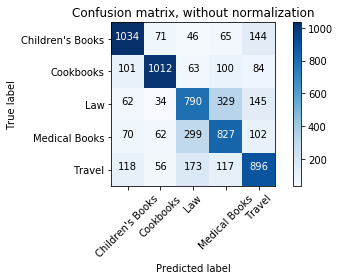

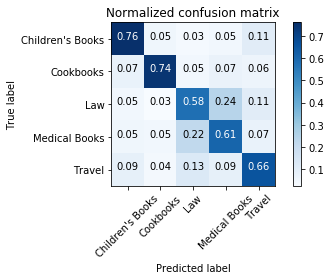

In [8]:
# Compute confusion matrix (run this and the above cell for the matrix)
class_names = ["Children's Books","Cookbooks","Law","Medical Books","Travel"]
cnf_matrix = confusion_matrix(val_labels_shuffled,predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [2]:
# Glove Model Alone
import pickle
import matplotlib.pyplot as plt

with open("./title_classification/Final_Logreg_glove_main.pkl","rb") as f:
    logreg = pickle.load(f)
with open('./title_classification/pretrained_glove_val_main_vectors', 'rb') as f:
    title_test_vectors = pickle.load(f) #
with open('./title_classification/train_test_glove_main.pkl','rb') as f:  # Python 3: open(..., 'rb')
     X_train,X_test,X_val,y_train,y_test,y_val,y_genre_train,y_genre_test,y_genre_test_final = pickle.load(f)#
    
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
predictions = logreg.predict(title_test_vectors)
print(accuracy_score(y_genre_test_final,predictions))
print(classification_report(y_genre_test_final,predictions))
# print(confusion_matrix(y_genre_test_final,predictions))
# confusion_matrx = confusion_matrix(y_genre_test_final,predictions)

0.8622058823529412
                        precision    recall  f1-score   support

      Children's Books       0.77      0.81      0.79      1360
Cookbooks, Food & Wine       0.92      0.90      0.91      1360
                   Law       0.89      0.86      0.87      1360
         Medical Books       0.89      0.88      0.88      1360
                Travel       0.85      0.87      0.86      1360

           avg / total       0.86      0.86      0.86      6800

[[1101   53   52   40  114]
 [  79 1222    8   22   29]
 [  65   10 1171   71   43]
 [  69   16   68 1192   15]
 [ 114   26   23   20 1177]]


In [3]:
#Combined Model

import pickle
import numpy as np
from glove import Corpus, Glove

with open("train_labels_x_main.pkl", "rb") as f:
    train_labels = pickle.load(f)
with open("val_labels_x_main.pkl", "rb") as f:
    test_labels = pickle.load(f)
with open("train_features_x_main.pkl", "rb") as f:
    train_features = pickle.load(f)
with open("val_features_x_main.pkl", "rb") as f:
    test_features = pickle.load(f)
with open("test_labels_x_main.pkl", "rb") as f:
    test_labels = pickle.load(f)
with open("test_features_x_main.pkl", "rb") as f:
    test_features = pickle.load(f)
with open('./title_classification/pretrained_glove_train_main_vectors', 'rb') as f:
    glove_train_vectors = pickle.load(f)
with open('./title_classification/pretrained_glove_val_main_vectors', 'rb') as f:
    glove_val_vectors = pickle.load(f)
with open('./title_classification/pretrained_glove_test_main_vectors', 'rb') as f:
    glove_test_vectors = pickle.load(f)


final_input_features = np.concatenate([train_features, glove_train_vectors], axis= 1)
final_val_features = np.concatenate([test_features, glove_test_vectors], axis= 1)
final_test_features = np.concatenate([test_features, glove_test_vectors], axis= 1)

with open("combined_logreg_main.pkl","rb") as f:
    final_logreg_model = pickle.load(f)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
predictions = final_logreg_model.predict(final_test_features)
print(accuracy_score(test_labels,predictions))
print(classification_report(test_labels,predictions))

    

0.8723529411764706
                        precision    recall  f1-score   support

              Children       0.84      0.85      0.85      1360
Cookbooks, Food & Wine       0.92      0.91      0.91      1360
                   Law       0.88      0.85      0.87      1360
         Medical Books       0.87      0.87      0.87      1360
                Travel       0.86      0.88      0.87      1360

           avg / total       0.87      0.87      0.87      6800

